In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',  None)

In [5]:
df=pd.read_csv("final_scout_not_dummy.csv")
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [5]:
df.isna().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

<AxesSubplot:xlabel='make_model'>

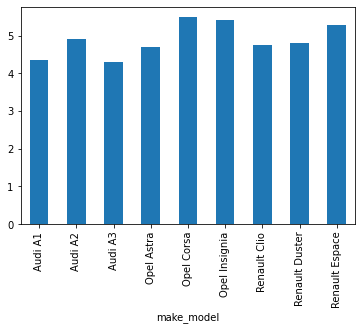

In [299]:
df_new.groupby("make_model").mean()["cons_comb"].plot(kind="bar")

In [6]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [11]:
[(i,df[i].nunique()) for i in df.columns]

[('make_model', 9),
 ('body_type', 8),
 ('price', 2952),
 ('vat', 2),
 ('km', 6691),
 ('Type', 5),
 ('Fuel', 4),
 ('Gears', 4),
 ('Comfort_Convenience', 6196),
 ('Entertainment_Media', 346),
 ('Extras', 659),
 ('Safety_Security', 4442),
 ('age', 4),
 ('Previous_Owners', 5),
 ('hp_kW', 77),
 ('Inspection_new', 2),
 ('Paint_Type', 3),
 ('Upholstery_type', 2),
 ('Gearing_Type', 3),
 ('Displacement_cc', 68),
 ('Weight_kg', 432),
 ('Drive_chain', 3),
 ('cons_comb', 62)]

In [45]:
X=df[["age", "hp_kW", "km",  'make_model',"cons_comb"]]
y=df.price

In [72]:
X

,age,hp_kW,km,make_model,cons_comb
0,3.0,66.0,56013.000000,Audi A1,3.8
1,2.0,141.0,80000.000000,Audi A1,5.6
2,3.0,85.0,83450.000000,Audi A1,3.8
3,3.0,66.0,73000.000000,Audi A1,3.8
4,3.0,66.0,16200.000000,Audi A1,4.1
...,...,...,...,...,...
15910,0.0,147.0,1647.362609,Renault Espace,5.3
15911,0.0,165.0,9900.000000,Renault Espace,7.4
15912,0.0,146.0,15.000000,Renault Espace,5.3
15913,0.0,147.0,10.000000,Renault Espace,5.3


In [117]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import  make_column_transformer
df_new=df[["age", "hp_kW", "km", 'make_model',"cons_comb"]]

cat_cols=df_new.select_dtypes("object").columns
ord_enc=OrdinalEncoder()
col_transfer=make_column_transformer((ord_enc,cat_cols),remainder="passthrough")
data=col_transfer.fit_transform(df_new)


In [245]:
df_dummy=pd.get_dummies(df_new)

In [241]:
pd.DataFrame(data)

,0,1,2,3,4
0,0.0,3.0,66.0,56013.000000,3.8
1,0.0,2.0,141.0,80000.000000,5.6
2,0.0,3.0,85.0,83450.000000,3.8
3,0.0,3.0,66.0,73000.000000,3.8
4,0.0,3.0,66.0,16200.000000,4.1
...,...,...,...,...,...
15910,8.0,0.0,147.0,1647.362609,5.3
15911,8.0,0.0,165.0,9900.000000,7.4
15912,8.0,0.0,146.0,15.000000,5.3
15913,8.0,0.0,147.0,10.000000,5.3


In [247]:
print(y.shape)
df_dummy

(15915,)


,age,hp_kW,km,cons_comb,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace
0,3.0,66.0,56013.000000,3.8,1,0,0,0,0,0,0,0,0
1,2.0,141.0,80000.000000,5.6,1,0,0,0,0,0,0,0,0
2,3.0,85.0,83450.000000,3.8,1,0,0,0,0,0,0,0,0
3,3.0,66.0,73000.000000,3.8,1,0,0,0,0,0,0,0,0
4,3.0,66.0,16200.000000,4.1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,0.0,147.0,1647.362609,5.3,0,0,0,0,0,0,0,0,1
15911,0.0,165.0,9900.000000,7.4,0,0,0,0,0,0,0,0,1
15912,0.0,146.0,15.000000,5.3,0,0,0,0,0,0,0,0,1
15913,0.0,147.0,10.000000,5.3,0,0,0,0,0,0,0,0,1


In [121]:
# train,test=(data[:,:4],y)
# xtrain,xtest,ytrain,ytest=train_test_split(data,test,random_state=101)

In [248]:
xtrain_d,xtest_d,ytrain_d,ytest_d=train_test_split(df_dummy,y,random_state=101)

In [77]:
ytrain

3448     18500
3130     13900
10410    11190
3840     21480
2438     21740
         ...  
5695     25090
8006     16800
1361     15000
1547     16210
13151    14985
Name: price, Length: 11936, dtype: int64

In [249]:
from sklearn.preprocessing import  MinMaxScaler
scalerd=MinMaxScaler()
xtrain_scd=scaler.fit_transform(xtrain)
xtest_scd=scaler.transform(xtest)
ytrain_scd=scaler.fit_transform(ytrain.values.reshape(-1,1)).ravel()
ytest_scd=scaler.transform(ytest.values.reshape(-1,1)).ravel()

In [57]:
df_new.head()

,age,hp_kW,km,make_model,cons_comb,price
0,3.0,66.0,56013.0,Audi A1,3.8,15770
1,2.0,141.0,80000.0,Audi A1,5.6,14500
2,3.0,85.0,83450.0,Audi A1,3.8,14640
3,3.0,66.0,73000.0,Audi A1,3.8,14500
4,3.0,66.0,16200.0,Audi A1,4.1,16790


In [123]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import  Dense,Dropout

In [250]:
model=Sequential()
model.add(Dense(64,activation="relu",input_shape=(xtrain_scd.shape[1],)))
model.add(Dense(32,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_absolute_error",optimizer="adam",metrics=["mean_absolute_error"])
# model.summary()
history=model.fit(xtrain_scd,ytrain_scd,epochs=50,validation_split=0.1,verbose=0)

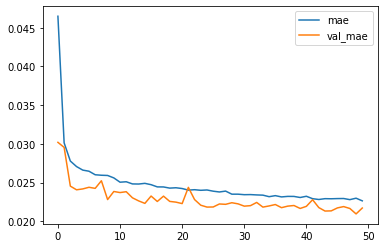

In [251]:
plt.plot(history.history["mean_absolute_error"],label="mae")
plt.plot(history.history["val_mean_absolute_error"],label="val_mae")
plt.legend();

In [253]:
preds=model.predict(xtest_sc).ravel()
predictions=scaler.inverse_transform( preds.reshape(-1,1)).ravel()

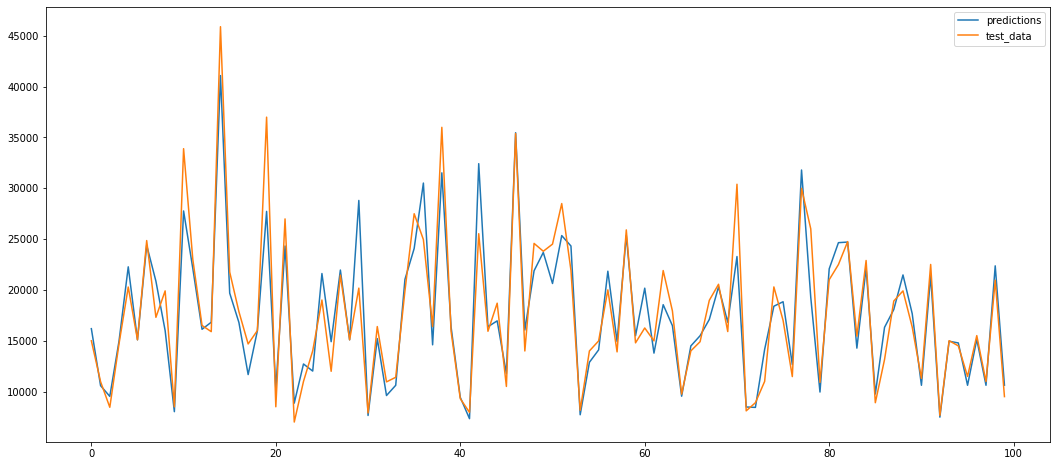

In [254]:
plt.figure(figsize=(18,8))
plt.plot(predictions[:100],label="predictions")
plt.plot(ytest[:100].values,label="test_data")
plt.legend();

In [185]:
xtest_sc[15]

array([0.        , 0.33333333, 0.17716535, 0.020347  , 0.14754098])

In [194]:
a=model.predict(scaler.transform(new_df.reshape(-1,1)).ravel().reshape(1,-1))
scaler.inverse_transform(a)

array([[9137.306]], dtype=float32)

In [143]:
preds.shape,ytest.shape

((3979,), (3979,))

In [127]:
xtest_sc[0]

array([0.375     , 0.        , 0.1023622 , 0.00519673, 0.27868852])

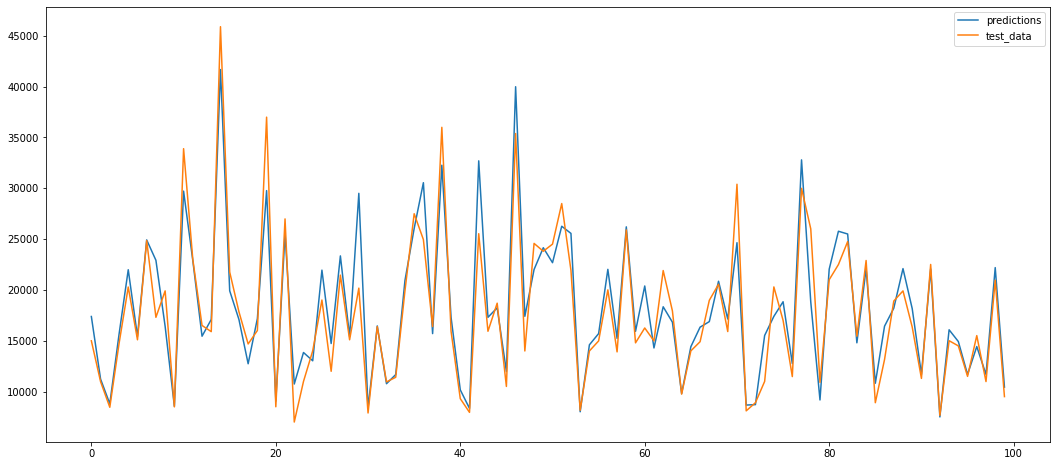

In [130]:
plt.figure(figsize=(18,8))
plt.plot(predictions[:100],label="predictions")
plt.plot(ytest[:100].values,label="test_data")
plt.legend();

In [278]:
import pickle 
from tensorflow.keras.models import  load_model
model.save("deeplr_model.h5")

In [279]:
pickle.dump(scaler,open("scaler","wb"))

In [264]:
pickle.dump(col_transfer,open("transformer","wb"))

In [280]:
new_model=load_model("deeplr_model.h5")
transformer1=pickle.load(open("transformer","rb"))

In [215]:
model.predict(xtest_sc[0].reshape(1,-1))

array([[0.17845863]], dtype=float32)

In [281]:
my_dict = {
    "age": 0,
    "hp_kW": 135,
    "km": 91000,
    'cons_comb':6.8,
    "make_model": "Audi A1"
    
}
new_df=transformer1.transform(pd.DataFrame([my_dict])).ravel()
new_df_sc=scaler.transform(new_df.reshape(-1,1)).ravel()
a=model.predict(new_df_sc.reshape(1,-1))
scaler.inverse_transform(a.reshape(-1,1))

array([[11068.547]], dtype=float32)

In [240]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [196]:
model.predict(new_df.reshape(1,-1))

array([[-1695.904]], dtype=float32)

In [169]:
new_pred=new_model.predict(new_df.reshape(1,-1)).ravel()
new_pred

array([-1695.904], dtype=float32)

In [176]:
scaler.inverse_transform(new_pred.reshape(1,-1))

array([[-1.1811477e+08]], dtype=float32)

In [108]:
pd.DataFrame.from_dict([my_dict])

,age,hp_kW,km,cons_comb,make_model
0,4,120,15000,2,Audi A1
